In [ ]:
 # python -m pip install dask[dataframe] --upgrade  # or python -m pip install
 !pip install dask[dataframe]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 5.2 MB/s 


In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar 
from matplotlib import pyplot as plt  

In [ ]:
! pip install requests
! pip install aiohttp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 144 kB 20.6 MB/s 
     |████████████████████████████████| 271 kB 26.6 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 


In [18]:

#df = dd.read_csv('nyc-parking-tickets/*2017.csv')  
import requests
ddf = dd.read_csv('https://data.cityofnewyork.us/resource/2bnn-yakx.csv', blocksize=None)  
ddf


,summons_number,plate_id,registration_state,plate_type,issue_date,violation_code,vehicle_body_type,vehicle_make,issuing_agency,street_code1,street_code2,street_code3,vehicle_expiration_date,violation_location,violation_precinct,issuer_precinct,issuer_code,issuer_command,issuer_squad,violation_time,time_first_observed,violation_county,violation_in_front_of_or_opposite,house_number,street_name,intersecting_street,date_first_observed,law_section,sub_division,violation_legal_code,days_parking_in_effect,from_hours_in_effect,to_hours_in_effect,vehicle_color,unregistered_vehicle,vehicle_year,meter_number,feet_from_curb,violation_post_code,violation_description,no_standing_or_stopping_violation,hydrant_violation,double_parking_violation
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,int64,object,object,object,int64,int64,int64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,int64,object,int64,object,object,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [19]:
ddf.columns

Index(['summons_number', 'plate_id', 'registration_state', 'plate_type',
       'issue_date', 'violation_code', 'vehicle_body_type', 'vehicle_make',
       'issuing_agency', 'street_code1', 'street_code2', 'street_code3',
       'vehicle_expiration_date', 'violation_location', 'violation_precinct',
       'issuer_precinct', 'issuer_code', 'issuer_command', 'issuer_squad',
       'violation_time', 'time_first_observed', 'violation_county',
       'violation_in_front_of_or_opposite', 'house_number', 'street_name',
       'intersecting_street', 'date_first_observed', 'law_section',
       'sub_division', 'violation_legal_code', 'days_parking_in_effect',
       'from_hours_in_effect', 'to_hours_in_effect', 'vehicle_color',
       'unregistered_vehicle', 'vehicle_year', 'meter_number',
       'feet_from_curb', 'violation_post_code', 'violation_description',
       'no_standing_or_stopping_violation', 'hydrant_violation',
       'double_parking_violation'],
      dtype='object')

In [ ]:
# The output of listing 2.1 might not be what you expected. While Pandas would display a sample of the data
#  when inspecting a Dask DataFrame, the metadata of the DataFrame is displayed. 
# Look at the datatype for each column
# Dask was built to handle medium and large datasets that can’t be loaded into RAM at once.

# DataFrames employ random sampling methods to profile and infer datatypes from a small sample of the data. 
# The npartitions value shows how many partitions the DataFrame is split into.

Taking advantage of parallelism like this could be very advantageous if the inc function took a long time to evaluate.

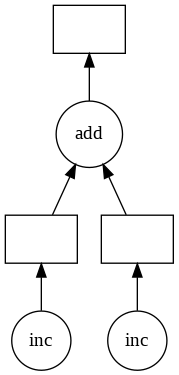

In [ ]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar 

def inc(i):
   return i + 1

def add(x, y):
   return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)


z.visualize() 

In [ ]:
z

Delayed('add-b0084344-9e8d-4c8c-9f2d-91ab46ce867c')

In [ ]:
z.compute()

5

Visualizing more complex DAGs with loops and collections

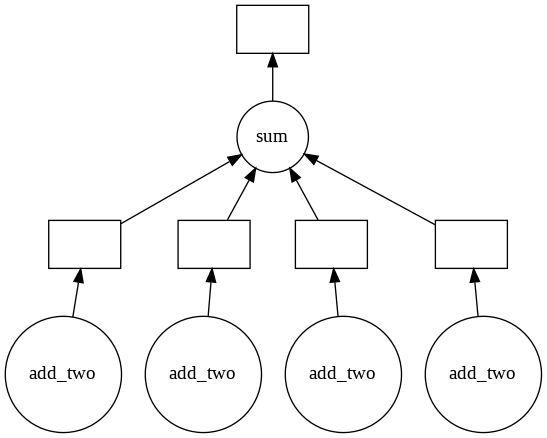

In [ ]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

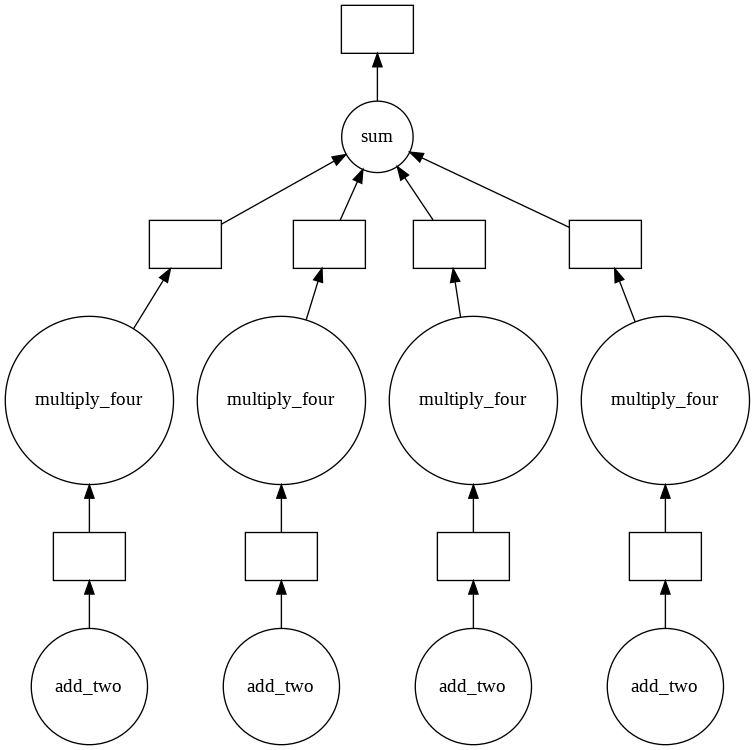

In [20]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

In [21]:
total.compute()

128